This implements the chapter 1 classifier from FastAi:

In [1]:
# imports
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

In [2]:
# creates dataloader
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224), num_workers=0, bs=64)

In [3]:
# creates learner based on resnet34 architecture
learn = vision_learner(dls, resnet34, metrics=error_rate)

c:\Users\menez\Documents\VSCode\MLPlayground\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\menez\Documents\VSCode\MLPlayground\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
# trains the model (takes about 3 mins)
learn.fine_tune(1)

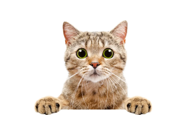

In [5]:
# evalues the model's inferencing
uploader = SimpleNamespace(data = ['cat.png'])
img = PILImage.create(uploader.data[0])

img.to_thumb(192)

In [6]:
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


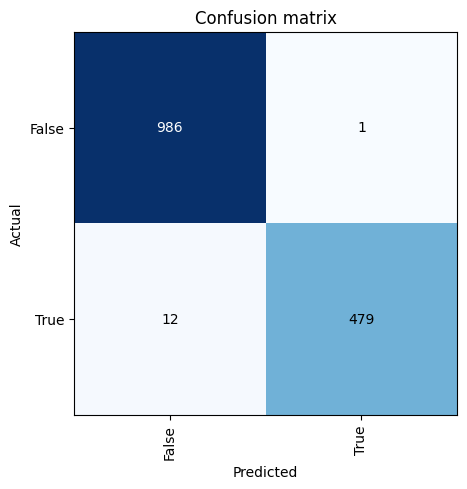

In [7]:
# classification analysis
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()